# Contents <a id='back'></a>

* [Introduction](#intro)
* [Step 1. Download data and prepare it for analysis](#data_review)
    * [Create library](#data_review_library)
    * [Load the data](#data_review_load)
    * [Fixing the data](#data_review_fix)
* [Step 2. Data analysis](#data_preprocessing)
    * [2.1 Proportion of various types of business](#analysis_1)
    * [2.2 Proportion of franchise-based and non-franchise businesses](#analysis_2)
    * [2.3 Business which is usually a franchise-based business](#analysis_3)
    * [2.4 Which are the characteristics of this type of franchise-based business](#analysis_4)
    * [2.5 The average number of seats for each type of business](#analysis_5)
    * [2.6 Move the address column to a separate column](#analysis_6)
    * [2.7 A chart showing the top ten street names](#analysis_7)
    * [2.8 Number of streets that have only one business](#analysis_8)
    * [2.9 The distribution of seat number](#analysis_9)
    * [2.10 General conclusion](#conclusion)
* [Step 3. Prepare the presentation](#presentation)
* [Findings](#end)

# Project Introduction

Every time we do an analysis, we need to formulate several hypotheses and test analyzes that we need to test further. Sometimes, the tests we do lead us to accept the hypothesis, other times we also need to reject it. To make the right decisions in business, we must understand whether the assumptions we make are correct or not.

In this project as an analyst I prepared a number of market research with data from open sources regarding the types of restaurant businesses in LA.

## Purpose:
1. To find out which type of market (franchise or non-franchise) is good for attracting investors
2. To recommend what type of business would be more profitable
3. To find out the number of seats that need to be prepared for the business


## Steps
As for the data that we will retrieve and analyze stored in a *file* `/datasets/rest_data_us.csv`.
There are several steps of the analysis this time, namely:
1. Download data and prepare it for analysis
2. Analyze data
3. Prepare the presentation

[Back to Contents](#back)

# Step 1. Download data and prepare it for analysis

## Create library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats as st
import seaborn as sns

## Load the data

In [2]:
rest_data = pd.read_csv('/datasets/rest_data_us.csv')

In [3]:
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
rest_data.object_name.unique()

array(['HABITAT COFFEE SHOP', "REILLY'S", 'STREET CHURROS', ...,
       'FIN-MELROSE', 'MEDIDATE COFFEE', 'CAFE SPROUTS'], dtype=object)

In [6]:
rest_data.chain.unique()

array([False, True, nan], dtype=object)

From the result, it shows that fixing the type of data type is needed for the `id` and `chain` columns and it is also necessary to fix the value in the `chain` column because there is a value 'nan'.

## Fixing the data

In [7]:
# fixing data type id
rest_data['id'] =rest_data['id'].astype('str')
rest_data.dtypes

id             object
object_name    object
address        object
chain          object
object_type    object
number          int64
dtype: object

In [8]:
# fixing data type chain
rest_data['chain'] = rest_data['chain'].astype(bool)
rest_data.dtypes

id             object
object_name    object
address        object
chain            bool
object_type    object
number          int64
dtype: object

In [9]:
rest_data.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [10]:
rest_data.chain.unique()

array([False,  True])

It can be seen from the data now, all the problem we had before are fixed, hence, it can be continued to the next step.

# Step 2. Data analysis

## Proportion of various types of business

In [11]:
rest_data.object_type.unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)

In [12]:
rest_data_grouped = rest_data.object_type.value_counts().reset_index()

In [13]:
rest_data_grouped

,index,object_type
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Restaurant'),
 Text(1, 0, 'Fast Food'),
 Text(2, 0, 'Cafe'),
 Text(3, 0, 'Pizza'),
 Text(4, 0, 'Bar'),
 Text(5, 0, 'Bakery')]

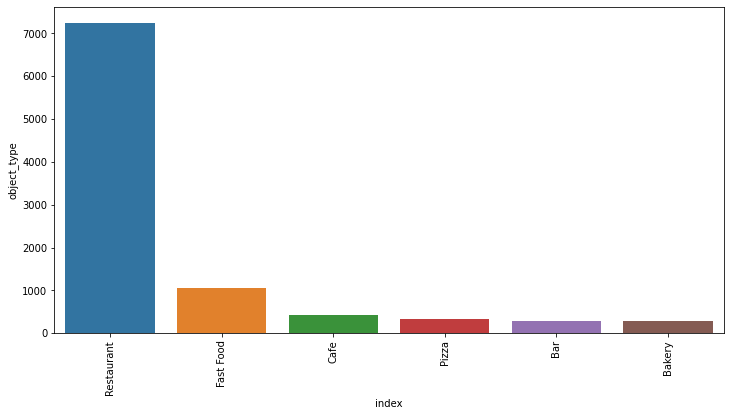

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(rest_data_grouped['index'], rest_data_grouped['object_type'], ax=ax)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)

It can be seen from the results of the graph above, it turns out that in LA the type of business in the Bakery sector has the lowest proportion less than 500 business types compared to the other five types of business, especially, restaurant has the highest proportion which is above than 7000 business type and is a promising business in LA.

## Proportion of franchise-based and non-franchise businesses

In [15]:
grouped_chain = rest_data.groupby('chain').count()

[Text(0, 0, 'False'), Text(1, 0, 'True')]

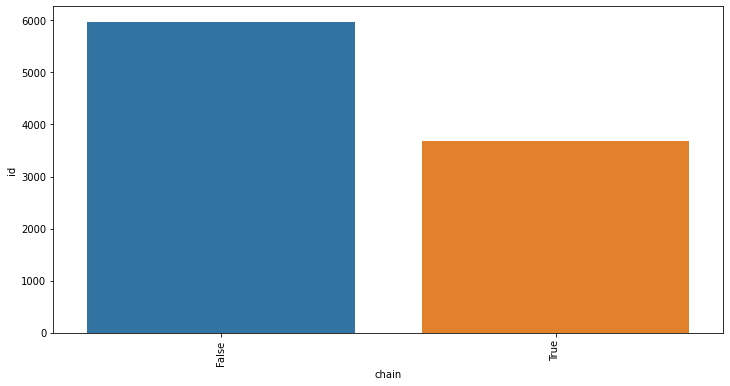

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x= grouped_chain.index, y= grouped_chain['id'], ax=ax)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90)

The result shows that proportion of non-franchise businesses is way much bigger instead of franchise businesses. the difference between those two is just around 1300, which is non-franchise businesses reach slightly out under 6000 and franchise-based approximates 4700.

## Business which is usually a franchise-based business

In [17]:
grouped_chain_object = pd.pivot_table(rest_data, values = 'object_name', index = 'object_type', columns = ['chain'], aggfunc = 'count')
grouped_chain_object = grouped_chain_object.fillna(0)
grouped_chain_object

chain,False,True
object_type,,
Bakery,0.0,283.0
Bar,215.0,77.0
Cafe,169.0,266.0
Fast Food,461.0,605.0
Pizza,166.0,154.0
Restaurant,4961.0,2294.0


In [18]:
grouped_chain_object['ratio'] = grouped_chain_object[True]/(grouped_chain_object[True]+grouped_chain_object[False])
grouped_chain_object

chain,False,True,ratio
object_type,,,
Bakery,0.0,283.0,1.000000
Bar,215.0,77.0,0.263699
Cafe,169.0,266.0,0.611494
Fast Food,461.0,605.0,0.567542
Pizza,166.0,154.0,0.481250
Restaurant,4961.0,2294.0,0.316196


<AxesSubplot:xlabel='object_type'>

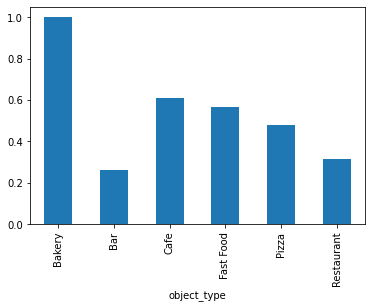

In [19]:
grouped_chain_object['ratio'].plot.bar()

This ratio shows for which one is a franchise-based business and also the other away around. It can be seen that the bakery is almost a franchise-based business compared to the bar which is the lowest one caused most of the bar businesses are independen. The other hands, the are also so many restaurants or cafes also belong to private ownership.

## Which are the characteristics of this type of franchise-based business

In [20]:
#filter by chain, analisi berdasarkan jumlahnya(jumlah proporsi) 
#dan rata2 jumlah kursi
rest_data.groupby('chain').agg(seat_average= ('number', 'mean'), proportion=('object_type', 'count'))

,seat_average,proportion
chain,,
False,46.171467,5972
True,39.675455,3679


<AxesSubplot:ylabel='chain'>

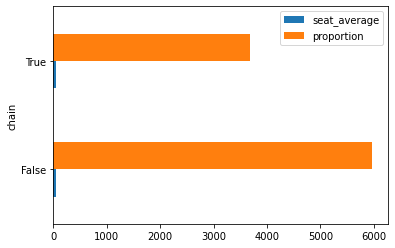

In [21]:
rest_data.groupby('chain').agg(seat_average= ('number', 'mean'), proportion=('object_type', 'count')).plot(kind='barh')

The characteristics of this type of franchise-based business are having several places with a large number of seats. If you look at the type of business, the ones with lots of seats are like restaurants, because they dine-in rarely take away, so you have to provide lots of chairs, while most of the restaurants are not franchised, most of the franchises are bakeries or cafes with few seats.

## The average number of seats for each type of business

In [22]:
rest_data.groupby('object_type').agg(seat_average= ('number', 'mean'))

,seat_average
object_type,
Bakery,21.773852
Bar,44.767123
Cafe,25.000000
Fast Food,31.837711
Pizza,28.459375
Restaurant,48.042316


<AxesSubplot:ylabel='object_type'>

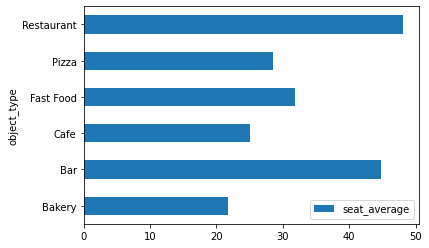

In [23]:
rest_data.groupby('object_type').agg(seat_average= ('number', 'mean')).plot(kind='barh')

Here, Restaurant is the largest number of seats, which makes perfect sense since restaurants usually cater to large groups of people such as families not just individuals. Which is the same for bars, in America, especially in LA, many young people come to crowded bars to just drink beer or chat. COmpared to the other two (Cafe and Bakery) normally people tend to order and take the order away with them.

## Move the address column to a separate column

In [24]:
rest_data['address_fix'] = rest_data['address'].apply(lambda x: ' '.join(x.split(' ')[1:])).to_frame()
rest_data

,id,object_name,address,chain,object_type,number,address_fix
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY # 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD # 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE 100


Now the addresses have sortiered and fixed to separate column.

## A chart showing the top ten street names by number of attempts

In [25]:
rest_address_top = rest_data.groupby('address_fix')['id'].count().reset_index()
rest_address_top_final = rest_address_top.sort_values(by='id', ascending=False).head(10)
rest_address_top_final

,address_fix,id
2691,W SUNSET BLVD,296
2622,W PICO BLVD,288
582,HOLLYWOOD BLVD,167
2837,WILSHIRE BLVD,161
1705,S VERMONT AVE,148
1918,SANTA MONICA BLVD,146
2170,W 3RD ST,145
147,BEVERLY BLVD,135
1295,S FIGUEROA ST,134
755,MELROSE AVE,128


<AxesSubplot:xlabel='address_fix', ylabel='id'>

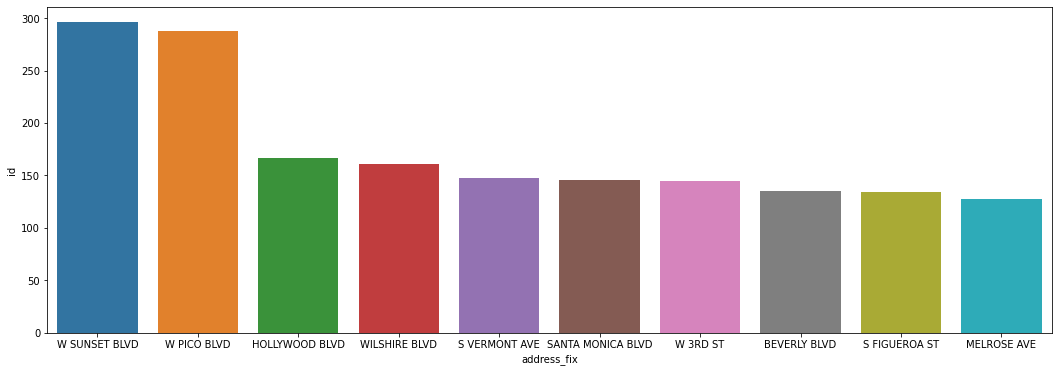

In [26]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x= rest_address_top_final['address_fix'], y= rest_address_top_final['id'], ax=ax)

In [27]:
rest_address_top.loc[rest_address_top.id == 1].shape[0]

2481

Can be seen from the 10 streets with the most number of restaurants. Which is W SUNSET BLVD reached first place with a total of 296 Restaurants around and MELROSE AVE in the t0th position which have 128 Restaurant.

## Number of streets that have only one business

In [28]:
# total number of roads/streets
rest_data.address_fix.nunique()

3097

In [29]:
rest_1_type_only = rest_data.groupby('address_fix')['object_type'].apply(lambda x: x.nunique()).reset_index()
rest_1_type_only.loc[rest_1_type_only.object_type == 1]

,address_fix,object_type
0,1/2 3RD ST,1
1,1/2 7TH ST,1
2,1/2 BEVERLY BLVD,1
3,1/2 CITY TERRACE DR,1
4,1/2 COLORADO BLVD,1
...,...,...
3090,YORK BLVD # B,1
3091,YOSEMITE DR,1
3093,Z00 DR,1
3095,ZOO DR,1


The number of streets that have one type of restaurant is 2761 out of a total of 3097 roads.

## The distribution of seat number on the street with the most effort

In [30]:
rest_pr = rest_data[rest_data['address_fix'].str.contains("W SUNSET BLVD")]
rest_pr

,id,object_name,address,chain,object_type,number,address_fix
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38,W SUNSET BLVD
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26,W SUNSET BLVD #A
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118,W SUNSET BLVD
33,11819,ONO HAWAIIAN BBQ,5539 W SUNSET BLVD,True,Restaurant,35,W SUNSET BLVD
...,...,...,...,...,...,...,...
9498,21284,PA ORD EXPRESS,5301 W SUNSET BLVD # 11,False,Fast Food,31,W SUNSET BLVD # 11
9523,21309,BUTTER'S ICE CREAM,2925 W SUNSET BLVD,False,Restaurant,29,W SUNSET BLVD
9527,21313,REGULA GUY'S PIZZA,5173 W SUNSET BLVD,False,Pizza,20,W SUNSET BLVD
9562,21348,7-ELEVEN STORE #18778D,7600 W SUNSET BLVD,False,Restaurant,1,W SUNSET BLVD


<AxesSubplot:>

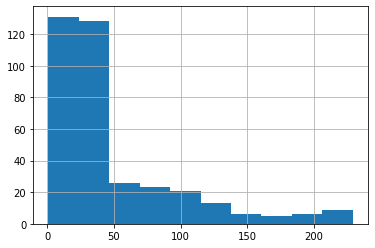

In [31]:
rest_pr.number.hist()

Can be seen from either the table or histogram that to see the number of seats for each restaurant on W SUNSET BLVD street. And the histogram displays 0-48 seats for the most and the rest above 50 seats.

## General conclusion

In conclusion:
1. there are 2 types of businesses in LA, namely franchises and non-franchises.
2. the proportion of non-franchised businesses is bigger/popular in LA with around 5972 businesses.
3. As for the bakery is almost franchise-based business compare to bar which one is the lowest one caused most of bar businesses are independent such restaurants or cafes.
4. The characteristics of this type of franchise-based business are having several places with a large number of seats. If you look at the type of business, the ones with lots of seats are like restaurants, because they dine-in rarely take away, so you have to provide lots of chairs, while most of the restaurants are not franchised, most of the franchises are bakeries or cafes with few seats.
5. Restaurant is the largest number of seats, since restaurants usually cater to large groups of people such as families not just individuals. Which is the same for bars, in America, especially in LA, many young people come to crowded bars to just drink beer or chat.
6. W SUNSET BLVD reached first place with a total of 296 Restaurants around and MELROSE AVE in the t0th position which have 128 Restaurant.
7. The number of streets that have one type of restaurant is 2761 out of a total of 3097 roads.
8. The number of seats for each restaurant on W SUNSET BLVD street. And the histogram displays 0-48 seats for the most and the rest above 50 seats.

As for the development that needs to be improved for this type of franchise business, namely, reducing the number of seats on certain streets because people tend to choose to wrap the food they order from types of franchise businesses such as cafes and bakeries.

# Step 3. Prepare the presentation

Presentasi: <https://drive.google.com/file/d/1z4HayuowdZvE1C1T-dxhvC15zHwGeIHY/view?usp=sharing>